In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import numpy as np
import pandas as pd

In [2]:
[predictions_list, labels_all_deg_seed, labels_all_simba_seed, labels_all_simba_seed2] = \
    np.load('/Users/alexanderhsu/Google Drive/My Drive/2023Data/asoid_manuscript/predictions_20seeds.npy', allow_pickle=True)
with open('/Users/alexanderhsu/Google Drive/My Drive/2023Data/asoid_manuscript/ALL_test_data.sav', 'rb') as fr:
    [data_test, targets_test] = joblib.load(fr)

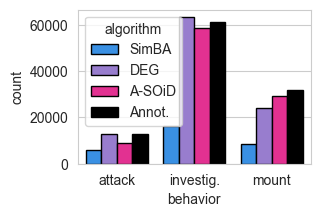

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
s = 1
data_dict = {'algorithm':
                 np.hstack([np.repeat(['Annot.'],
                                      len(targets_test[(targets_test<3)])),
                            np.repeat(['SimBA'],
                                      len(labels_all_simba_seed2[s][(targets_test<3) &
                                                                    (labels_all_simba_seed2[s]<3)])),
                            np.repeat(['DEG'],
                                      len(labels_all_deg_seed[s][(targets_test<3) &
                                                                 (labels_all_deg_seed[s]<3)])),
                            np.repeat(['A-SOiD'],
                                      len(predictions_list[-1][s][(targets_test<3) &
                                                                  (predictions_list[-1][s]<3)]))]),
             'behavior':
                 np.hstack([targets_test[(targets_test<3)],
                            labels_all_simba_seed2[s][(targets_test<3) &
                                                      (labels_all_simba_seed2[s]<3)],
                            labels_all_deg_seed[s][(targets_test<3) &
                                                   (labels_all_deg_seed[s]<3)],
                            predictions_list[-1][s][(targets_test<3) &
                                                    (predictions_list[-1][s]<3)]])}
df = pd.DataFrame(data=data_dict)
sns.countplot(data=df,
              x="behavior",
              hue="algorithm",
              hue_order=['SimBA', 'DEG', 'A-SOiD', 'Annot.'],
              edgecolor='k',
              palette=['dodgerblue', 'mediumpurple', 'deeppink', 'k'],
              ax=ax)
ax.set_xticklabels(['attack', 'investig.', 'mount'])
plt.show()
